In [1]:
import numpy as np
import os,sys,inspect
import importlib

randseed = 13344

# import my functions:
dirpath = os.getcwd()
i = 0
while(os.path.basename(dirpath) != "IEMS450_HW") and i <10:
    dirpath = os.path.dirname(dirpath) 
    i = i + 1
targetdir = dirpath + '/HW1/functions'
if targetdir not in sys.path:
    sys.path.insert(0,targetdir)

import objective_function as obj
importlib.reload(obj)
import opt_quadraticfunc as opt_q
importlib.reload(opt_q)

<module 'opt_quadraticfunc' from '/Users/jingyuanwang/GitHub/IEMS450_HW/HW1/functions/opt_quadraticfunc.py'>

# Initialize

In [2]:
# set up the problem
np.random.seed(randseed)
m, L = 0.01, 1
D = 10 ** np.random.rand(100)
D = (D - np.min(D)) / (np.max(D) - np.min(D)) 
A = np.diag(m + D * (L - m))

# save the function
f = obj.f(A)

# Test the functions

In [3]:
# starting point
np.random.seed(randseed)
x0 = np.random.rand(100)

In [4]:
importlib.reload(opt_q)

model1 = opt_q.steepest_descent(f, method = 'constant step length', alpha=1/(f.L), print_every_n_step=20)
model2 = opt_q.steepest_descent(f, method = 'exact line search'   , print_every_n_step=20)
model3 = opt_q.steepest_descent(f, method = 'Nesterov’s optimal method', print_every_n_step=20)
model4 = opt_q.steepest_descent(f, method = 'heavy-ball' , print_every_n_step=20)

In [5]:
model1.run(x0)
model2.run(x0)
model3.run(x0)
model4.run(x0)

constant step length:
iter    0: obj = 2.228320E+01, improve = 9.976717E+03
iter   20: obj = 3.035643E-03, improve = 5.179141E-04
iter   40: obj = 2.640024E-04, improve = 2.725980E-05
iter   60: obj = 5.316639E-05, improve = 3.665371E-06
iter   80: obj = 1.697280E-05, improve = 8.737987E-07
iter  100: obj = 6.862465E-06, improve = 2.916852E-07
iter  120: obj = 3.160019E-06, improve = 1.176510E-07
iter  140: obj = 1.579634E-06, improve = 5.324680E-08
complete iter  155: obj = 9.760153E-07


exact line search:
iter    0: obj = 2.228320E+01, improve = 9.976717E+03
iter   20: obj = 3.834679E-04, improve = 8.824853E-05
iter   40: obj = 2.179636E-05, improve = 2.406543E-06
iter   60: obj = 3.871789E-06, improve = 3.010888E-07
iter   80: obj = 1.000715E-06, improve = 6.444444E-08
complete iter   81: obj = 9.405860E-07


Nesterov’s optimal method:
iter    0: obj = 2.228320E+01, improve = 9.976717E+03
iter   20: obj = 1.464260E-04, improve = 5.329799E-05
iter   40: obj = 4.313265E-06, improve =

## check scipy

In [6]:
import scipy.optimize as opt

In [7]:
#opt.minimize(f.value, x0, jac=f.der_1st, hess=f.der_2nd, method = 'Newton-CG')

# Perform 10 trial runs, varying the staringpoint, and report the averaged the number of iterations required for convergence.

In [8]:
# ---- I. starting point
np.random.seed(randseed)
x_0 = {}
for i in range(10):
    x_0[i] = np.random.rand(100)

In [9]:
# ---- II. run optimization
required_steps = {'constant step length': [],
                  'exact line search'   : [],
                  'Nesterov’s optimal method' : [],
                  'heavy-ball' : []}

# initialize the methods
importlib.reload(opt_q)
model1 = opt_q.steepest_descent(f, method = 'constant step length', alpha=1/(f.L), print_results=False)
model2 = opt_q.steepest_descent(f, method = 'exact line search'   , print_results=False)
model3 = opt_q.steepest_descent(f, method = 'Nesterov’s optimal method', print_results=False)
model4 = opt_q.steepest_descent(f, method = 'heavy-ball', print_results=False)
methods        = {'constant step length': model1,
                  'exact line search'   : model2,
                  'Nesterov’s optimal method' : model3,
                  'heavy-ball' : model4}

# run for different x0
for j in range(10):
    for method in opt_q.steepest_descent.method_list:
        methods[method].run(x0 = x_0[j])
        num_iter = methods[method].i
        # save convergent steps
        required_steps[method] = required_steps[method] + [num_iter]

In [10]:
# ---- III. print
for method in opt_q.steepest_descent.method_list:
    steps = np.array(required_steps[method]).mean()
    print(f'steepest descent - fixed steps : {steps :4.1f} {method} ')

steepest descent - fixed steps : 376.7 constant step length 
steepest descent - fixed steps : 190.2 exact line search 
steepest descent - fixed steps : 123.2 Nesterov’s optimal method 
steepest descent - fixed steps : 84.5 heavy-ball 


# Draw a plot of the convergence behavior on a typical run

In [11]:
import matplotlib.pyplot as plt

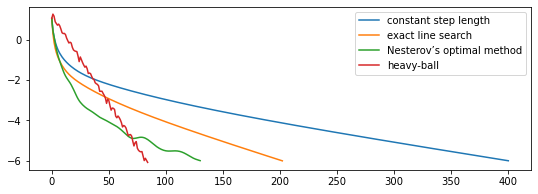

In [12]:
# draw the result of the last run
burn_steps = 0
stop_step  = 500

plt.figure(figsize=(9, 3))
plt.plot( np.log10( model1.obj_list[burn_steps:stop_step] ), label = model1.method)
plt.plot( np.log10( model2.obj_list[burn_steps:stop_step] ), label = model2.method)
plt.plot( np.log10( model3.obj_list[burn_steps:stop_step] ), label = model3.method)
plt.plot( np.log10( model4.obj_list[burn_steps:stop_step] ), label = model4.method)
plt.legend(loc='best')